
## DATA SCIENCE CAPSOTNE PROJECT - CHOOSING THE TOWN TO LIVE IN SINGAPORE

### IBM Data Science Professional Certificate

#### Week 5 Project Assignment



### A. INSTALLATION & IMPORT OF PACKAGES


In [1]:
! pip install folium==0.5.0
print('Installed Folium for the map')
!pip install geopy
print('Installed Geopy')
!pip install geocoder
print('Installed Geocoder')

Installed Folium for the map
Installed Geopy
Installed Geocoder


In [2]:
import pandas as pd # This library is for data analsysis
import numpy as np  # This library is for handling data
import requests # This library is for handling requests
import folium   # This library is for creating the maps
import json     # This library is for handling json files
import geocoder # This library is for getting coordinates
from geopy.geocoders import Nominatim     # This library is to convert into latitude and longitude values
from IPython.display import Image         # THis library is for rendering the map images
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.pyplot as plt           # This library is to plot bar graphs etc
import matplotlib.cm as cm
import matplotlib.colors as colors

print('All the necessary libraries have been imported')

All the necessary libraries have been imported


### B.DATA LOADING

In [3]:
# Used IBM Watson - jupyter data upload facility to read into the dataframe. Code from the tool
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cb80d05983d94b4195a2d926050a28f6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ATQFHSgy-owTeFlfBvSaRgo2JZRxYeyC4PE_ZVflipmf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_cb80d05983d94b4195a2d926050a28f6.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-fix2ulz2b97kld',Key='HDBpopulationinhdbbytown.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
print('CSV file read into the code')

CSV file read into the code


In [4]:
df_HDB = pd.read_csv(body)
df_HDB.rename(columns = {'financial_year':'YEAR','town_or_estate':'SGTOWN','population':'POP'}, inplace = True) 
df_HDB.shape

(295, 3)

In [5]:
df_HDB

,YEAR,SGTOWN,POP
0,2008,Ang Mo Kio,148200
1,2008,Bedok,197900
2,2008,Bishan,66500
3,2008,Bukit Batok,109100
4,2008,Bukit Merah,140600
...,...,...,...
290,2018,Serangoon,68000
291,2018,Tampines,231800
292,2018,Toa Payoh,104200
293,2018,Woodlands,242800


### C.DATA ANALYSIS / WRANGLING / SHORTLISTING

In [6]:
# Choosing only the latest year data and then dropping the year column and resetting the index
df_HDB1 = df_HDB[df_HDB['YEAR']==2018] 

In [7]:
df_HDB1 = df_HDB1.drop(columns=['YEAR'])

In [8]:
df_HDB1.reset_index(drop=True, inplace=True)
df_HDB1

,SGTOWN,POP
0,Ang Mo Kio,141600
1,Bedok,191300
2,Bishan,62100
3,Bukit Batok,115200
4,Bukit Merah,144300
5,Bukit Panjang,120100
6,Bukit Timah,8300
7,Central Area,27300
8,Choa Chu Kang,168500
9,Clementi,71900


### D. GETTING COORDINATES

In [9]:
# loop through dataframe and geocoding each SG town 
lati = []
longi = []
for i in range(0,df_HDB1.shape[0]):
    SGTOWN = df_HDB1.iloc[i,0]
    g = geocoder.arcgis('{},Singapore'.format(SGTOWN))
    lati.append(g.latlng[0])
    longi.append(g.latlng[1])

df_HDB1['Latitude'] = lati
df_HDB1['Longitude'] = longi

df_HDB1

,SGTOWN,POP,Latitude,Longitude
0,Ang Mo Kio,141600,1.37161,103.84546
1,Bedok,191300,1.32425,103.95297
2,Bishan,62100,1.35079,103.85110
3,Bukit Batok,115200,1.34952,103.75277
4,Bukit Merah,144300,1.28417,103.82306
5,Bukit Panjang,120100,1.37877,103.76977
6,Bukit Timah,8300,1.34041,103.77221
7,Central Area,27300,1.28883,103.84625
8,Choa Chu Kang,168500,1.38616,103.74618
9,Clementi,71900,1.31438,103.76537


In [10]:
# Plotting the 26 SG Towns using Folium
# Country : Singapore
# Latitude : 1.28967
# Longitude : 103.85007

SGMap = folium.Map(location=[1.28967,103.8500],zoom_start=11)

In [11]:
# Visualizing all the SG Towns on the map
for lat,lng,SGTOWN,POP in zip(df_HDB1['Latitude'],df_HDB1['Longitude'],df_HDB1['SGTOWN'],df_HDB1['POP']):
    label = '{}','{}'.format(SGTOWN)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=4,
    popup=label,
    color='blue',
    fill=True,
    fill_color='white',
    fill_opacity=0.4,
    parse_html=False).add_to(SGMap)
SGMap

In [12]:
# Choosing SG Towmns with a population less than the average population across the towns
df_HDB2 = df_HDB1[df_HDB1['POP'] < df_HDB1['POP'].median()]
df_HDB2 = df_HDB2.reset_index().drop(columns='index') 
df_HDB2

,SGTOWN,POP,Latitude,Longitude
0,Bishan,62100,1.35079,103.85110
1,Bukit Timah,8300,1.34041,103.77221
2,Central Area,27300,1.28883,103.84625
3,Clementi,71900,1.31438,103.76537
4,Geylang,86900,1.31147,103.88218
5,Jurong East,77300,1.33437,103.74367
6,Kallang/Whampoa,106100,1.33333,103.86667
7,Marine Parade,21400,1.30306,103.90778
8,Pasir Ris,107800,1.37194,103.94994
9,Queenstown,81800,1.29966,103.80172


### E. USING FOURSQUARE API TO GET VENUES

In [13]:
venuelist = [] # List to store all venues from all towns

CLIENT_ID = 'T45H5I2YZRDISMIQMZEGIBJ2Y2KXHJFDHUMQYGBNFPPMH50A' # my Foursquare ID
CLIENT_SECRET = 'GS44PV5XTZRKICCNS3UJWGYOAYILFO01VHLMABYCLSLU1B1C' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

RADIUS = 1000 # within a kilometer radius
LIMIT = 100   # restricting to 100 venues

for i in range(0,df_HDB2.shape[0]):
    SGTOWN = df_HDB2.iloc[i,0]
    LATITUDE = df_HDB2.iloc[i,2]
    LONGITUDE = df_HDB2.iloc[i,3]
    
    # Creating the 4 Square API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        LATITUDE,
        LONGITUDE,
        RADIUS, 
        LIMIT)
    
    # make the GET request and get information on the venues 
    result = requests.get(url).json()["response"]['groups'][0]['items']
    
    #collect the relevant information of venue - name and category)
    for venue in result:
        name = venue['venue']['name']
        category = venue['venue']['categories'][0]['name']
        venuelist.append([SGTOWN,name,category])

num_venues = len(venuelist)
num_venues
print(num_venues ,'Venues extracted from Foursquare')

992 Venues extracted from Foursquare


In [14]:
SGTOWN_LIST=[] 
NAME_LIST=[]
TYPE_LIST=[]
for i in range(0,len(venuelist)):
    SGTOWN_LIST.append(venuelist[i][0])
    NAME_LIST.append(venuelist[i][1])
    TYPE_LIST.append(venuelist[i][2])

# creating a dataframe to store the SG Town name, Name of Venue and Type of Venue   
df_SGVENUE = pd.DataFrame()    
df_SGVENUE['SGTOWN'] = SGTOWN_LIST
df_SGVENUE['NAME'] = NAME_LIST
df_SGVENUE['TYPE'] = TYPE_LIST
df_SGVENUE.head(10)

,SGTOWN,NAME,TYPE
0,Bishan,Tori-Q,Japanese Restaurant
1,Bishan,Starbucks,Coffee Shop
2,Bishan,Dian Xiao Er 店小二,Chinese Restaurant
3,Bishan,Gymm Boxx XL,Gym
4,Bishan,Bishan Cafeteria (Eating House),Food Court
5,Bishan,食香阁 Shi Xiang Ge La Mian . Shaved Noodle,Shaanxi Restaurant
6,Bishan,Din Tai Fung 鼎泰豐,Dumpling Restaurant
7,Bishan,Popular Bookstore,Bookstore
8,Bishan,Bishan Swimming Complex,Pool
9,Bishan,Bishan Sports Hall,Stadium


In [15]:
num_categories = df_SGVENUE['TYPE'].unique().size
print(num_categories,'unique venue types are available in SG')

180 unique venue types are available in SG


In [16]:
df_SGVENUE['TYPE'].unique()

array(['Japanese Restaurant', 'Coffee Shop', 'Chinese Restaurant', 'Gym',
       'Food Court', 'Shaanxi Restaurant', 'Dumpling Restaurant',
       'Bookstore', 'Pool', 'Stadium', 'Pet Store', 'Electronics Store',
       'Ice Cream Shop', 'Supermarket', 'Shopping Mall',
       'Asian Restaurant', 'Pharmacy', 'Thai Restaurant',
       'Cosmetics Shop', 'Seafood Restaurant', 'Bubble Tea Shop', 'Park',
       'Fried Chicken Joint', 'Gastropub', 'Café', 'Multiplex',
       'Italian Restaurant', 'Department Store',
       'Eastern European Restaurant', 'Dessert Shop', 'Pizza Place',
       'Bakery', 'Smoke Shop', 'Bistro', 'Korean Restaurant',
       'Indian Restaurant', 'BBQ Joint', 'Nature Preserve', 'Escape Room',
       'Beer Store', 'Dim Sum Restaurant', 'Noodle House',
       'Sandwich Place', 'Diner', 'Hainan Restaurant', 'Bar',
       'Gas Station', 'Grocery Store', 'Soup Place', 'Massage Studio',
       'Australian Restaurant', 'Fast Food Restaurant',
       'Spanish Restaurant', 'V

### F.  ANALYSIS OF VENUES TO SHORTLIST

In [17]:
SGPIV = pd.pivot_table(df_SGVENUE,index='SGTOWN',columns='TYPE',aggfunc=np.size,fill_value=0) 
SGPIV.columns = SGPIV.columns.droplevel(0)
SGPIV

TYPE,Accessories Store,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Watch Shop,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
SGTOWN,,,,,,,,,,,,,,,,,,,,,
Bishan,0,0,0,0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bukit Timah,0,0,0,0,2,0,1,1,2,1,...,0,1,0,0,0,0,0,0,0,0
Central Area,0,0,2,0,0,0,0,1,1,2,...,2,0,0,0,0,1,1,3,1,1
Clementi,0,0,0,1,4,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
Geylang,0,0,0,0,4,1,0,4,1,1,...,4,0,0,0,0,0,0,0,0,1
Jurong East,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
Kallang/Whampoa,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Marine Parade,0,0,0,0,6,1,1,0,2,4,...,0,0,0,0,0,1,0,1,0,1
Pasir Ris,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
# Selecting only the choice of venues for selection criteria & applying custome weightage
ROBINvenues=['Gym','Waterfront','Shopping Mall','Wine Bar','Whisky Bar']
SGPIV1 = SGPIV.loc[:,ROBINvenues]

SGPIV1['Score'] = SGPIV1['Gym']*0.2+ \
                    SGPIV1['Waterfront']*0.2+ \
                    SGPIV1['Shopping Mall']*0.1+ \
                    SGPIV1['Wine Bar']*0.2+ \
                    SGPIV1['Whisky Bar']*0.1

# Get the dataframe with Score in descending order
SGPIV1 = SGPIV1.sort_values(by='Score',ascending=False)
SGPIV1

TYPE,Gym,Waterfront,Shopping Mall,Wine Bar,Whisky Bar,Score
SGTOWN,,,,,,
Central Area,2,1,1,3,1,1.4
Jurong East,2,0,4,0,0,0.8
Clementi,2,0,1,0,0,0.5
Marine Parade,0,1,1,1,0,0.5
Kallang/Whampoa,2,0,0,0,0,0.4
Bishan,1,0,1,0,0,0.3
Pasir Ris,1,0,1,0,0,0.3
Serangoon,0,0,1,1,0,0.3
Bukit Timah,0,0,2,0,0,0.2


In [19]:
# Merging the dataframes to get the coordinates for plotting in map
df_SGpivot = pd.DataFrame()
df_SGpivot = SGPIV1
df_SGScore = pd.merge(df_HDB2,df_SGpivot,on='SGTOWN')
df_SGScore = df_SGScore.sort_values(by=['Score'], ascending=False)
df_SGScore.reset_index(drop=True, inplace=True)
df_SGScore

,SGTOWN,POP,Latitude,Longitude,Gym,Waterfront,Shopping Mall,Wine Bar,Whisky Bar,Score
0,Central Area,27300,1.28883,103.84625,2,1,1,3,1,1.4
1,Jurong East,77300,1.33437,103.74367,2,0,4,0,0,0.8
2,Clementi,71900,1.31438,103.76537,2,0,1,0,0,0.5
3,Marine Parade,21400,1.30306,103.90778,0,1,1,1,0,0.5
4,Kallang/Whampoa,106100,1.33333,103.86667,2,0,0,0,0,0.4
5,Bishan,62100,1.35079,103.85110,1,0,1,0,0,0.3
6,Pasir Ris,107800,1.37194,103.94994,1,0,1,0,0,0.3
7,Serangoon,68000,1.35554,103.87660,0,0,1,1,0,0.3
8,Bukit Timah,8300,1.34041,103.77221,0,0,2,0,0,0.2
9,Geylang,86900,1.31147,103.88218,1,0,0,0,0,0.2


In [103]:
ROBINtown = df_SGScore.loc[0,"SGTOWN"]
ROBINtown

'Central Area'

## RESULTS
### G. DISPLAY RESULTS IN GRAPH & MAP

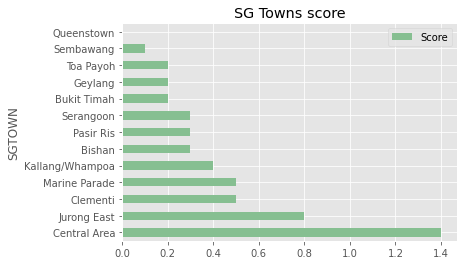

In [104]:
# Plotting a horizontal bar chart to visually see the scoring of the SG Town area by venue
plt.style.use('ggplot')
df_SGScore.plot.barh(x='SGTOWN', y='Score', title="SG Towns score",color='#86bf91');

plt.show(block=True);

In [100]:
# Generate a folium map showing bubbles by size of population and a marker showing the chosen SG TOWN
SGMap_score = folium.Map(location=[1.28967,103.8500],zoom_start=12)

for lat,lng,SGTOWN,POP in zip(df_SGScore['Latitude'],df_SGScore['Longitude'],df_SGScore['SGTOWN'],df_SGScore['POP']):
    label = '{}','{}'.format(SGTOWN)
    label = folium.Popup(label, parse_html=True)
    
    if(SGTOWN == ROBINtown):
        folium.CircleMarker(
        [lat,lng],
        radius=POP/4500,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1,
        parse_html=False).add_to(SGMap_score)
    else:
        folium.CircleMarker(
        [lat,lng],
        radius=POP/4500,
        popup=label,
        color='blue',
        fill=True,
        fill_color='white',
        fill_opacity=0.4,
        parse_html=False).add_to(SGMap_score)

In [101]:
folium.Marker(
    location=[df_SGScore.loc[0,"Latitude"], df_SGScore.loc[0,"Longitude"]],
    popup=(ROBINtown)).add_to(SGMap_score)
SGMap_score